In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(img,gray=True):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    if gray:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)

def load_img(filename, gray=False):
    if gray:
        img = cv2.imread("../../data/"+ filename,0)
    else:
        img = cv2.imread("../../data/"+ filename)
    view_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img,view_image

def load_sudoku(view=True, gray=True):
    img = load_img('sudoku.jpg',gray)
    if view:
        show_img(img,gray)
    return img

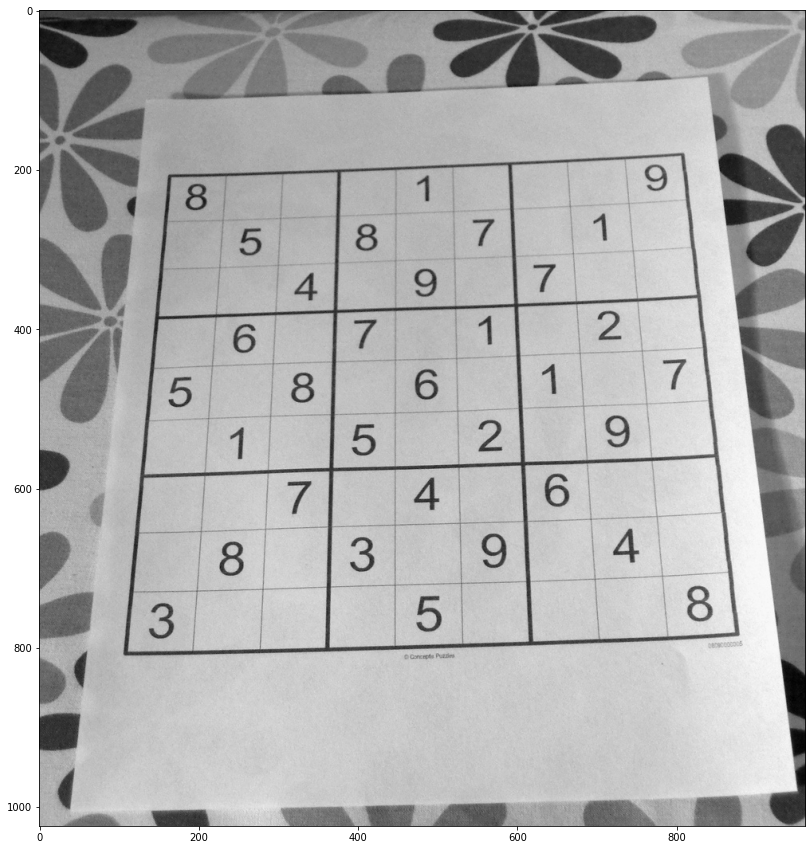

In [16]:
img,view_image = load_sudoku(False,True)
show_img(img,True)

In [20]:
sobel_x = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)

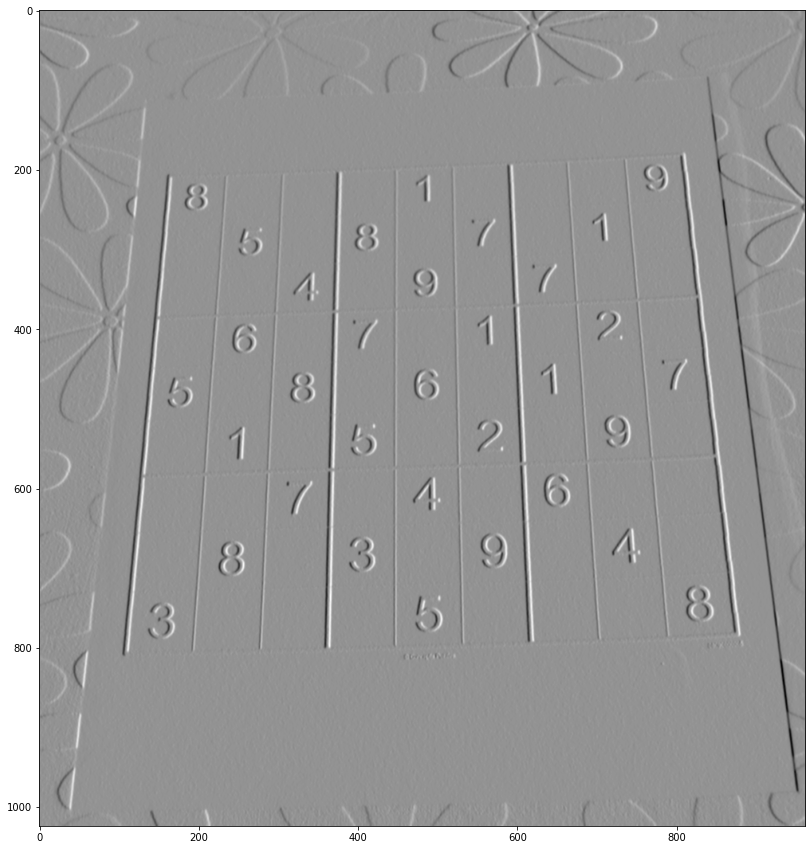

In [21]:
show_img(sobel_x)

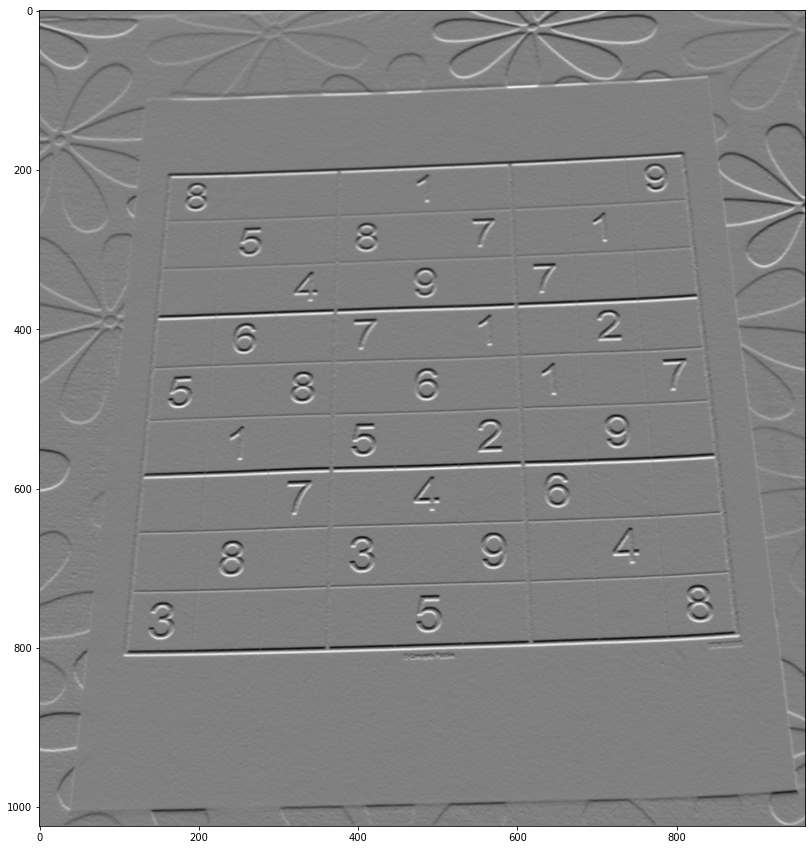

In [22]:
show_img(sobel_y)

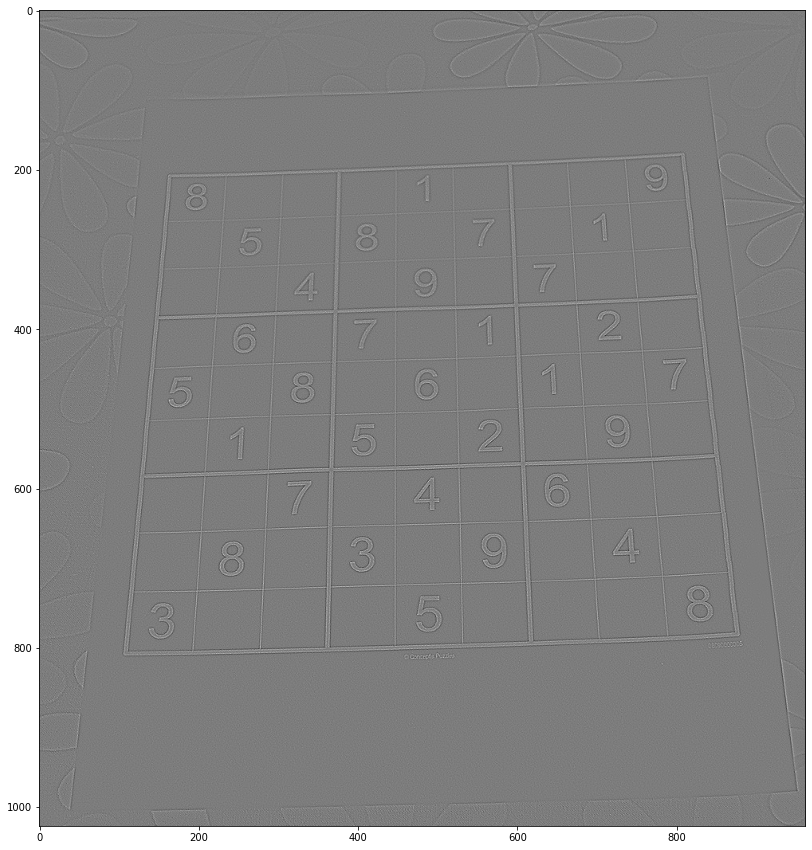

In [25]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
show_img(laplacian)

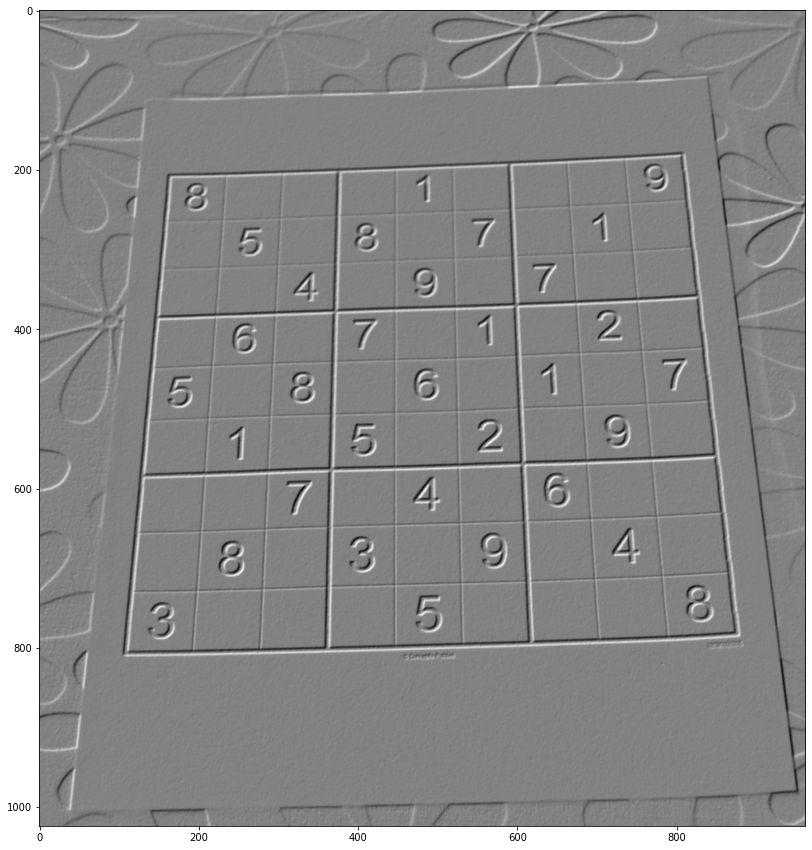

In [28]:
blended = cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)
show_img(blended)

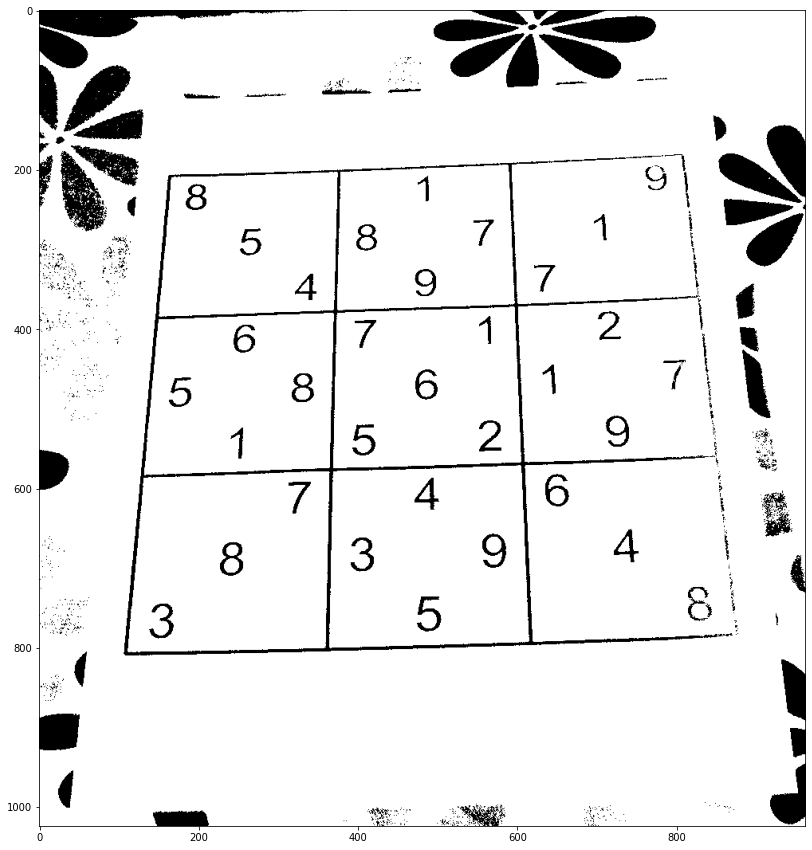

In [31]:
ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
show_img(thresh1)


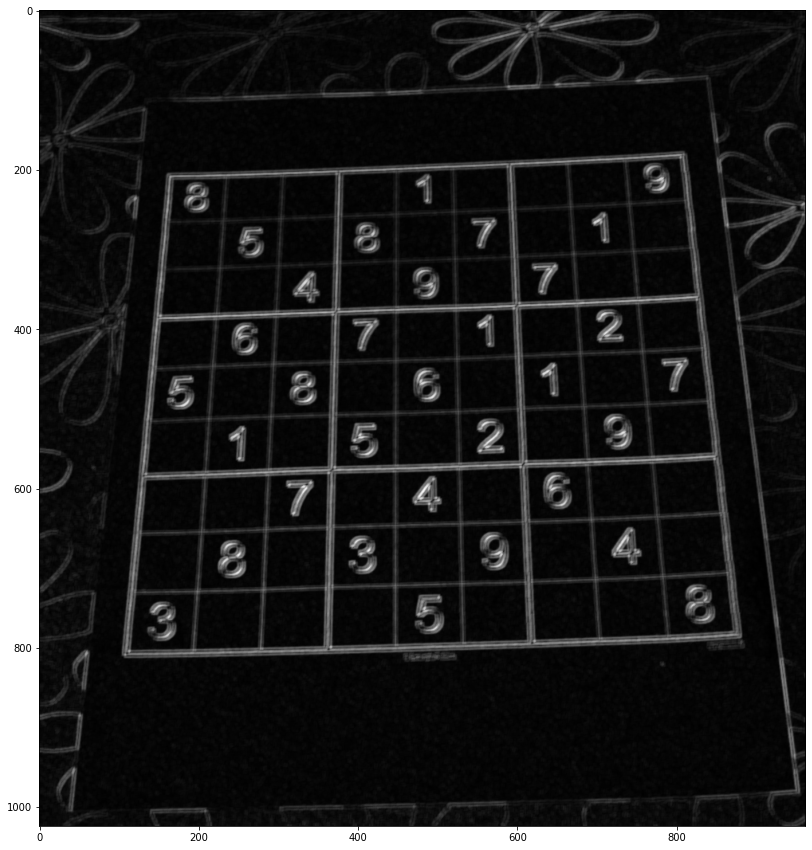

In [34]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
show_img(gradient)